# 2023/07/18 made by SAWADA SHO in Kobe University, Dept. of Oceanology, Lab. of Sediment Hazards and Disaster Risk

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from natsort import natsorted
import numpy as np
from scipy.optimize import curve_fit
import scipy as sp
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
def rho(t, a, b):
    return a*np.log10(t)+b

In [3]:
def ln(x, a, b):
    return a*np.log10(x)+b

In [4]:
def f0(x, a):
    return a*x

In [5]:
def f(x, a, b):
    return a*x+b

In [6]:
def M(t, x):
    
    file = r"C:\Users\vetsa\OneDrive\デスクトップ\seminar related\results\csv\pumice\raw.csv"
    data = pd.read_csv(file).iloc[:, :9]
    data.index = data['s']
    data = data.drop('Unnamed: 0', axis = 1).drop('s', axis = 1).drop('v', axis = 1).T

    ii = [int(i) for i in data.index][1:]

    list = []
    for M in data.columns:

        jj = data[M][1:]

        popt, pcov = curve_fit(ln, ii, jj)
        list.append(popt)

    Matrix = np.array(list)
    
    data = pd.DataFrame(Matrix, columns = ['a', 'b'])
    data.index = [30, 39, 40, 41, 43, 46, 48, 64]

    i = data.index
    y1 = data['a']
    y2 = data['b']

    popt1, pcov1 = curve_fit(f, i, y1)
    popt2, pcov2 = curve_fit(f, i, y2)

    return (f(x, popt1[0], popt1[1]))*np.log10(t)+f(x, popt2[0], popt2[1])

In [7]:
def m(t, x):
    
    file = r"C:\Users\vetsa\OneDrive\デスクトップ\seminar related\results\csv\pumice\non_dim.csv"
    data = pd.read_csv(file)
    data.index = data['Unnamed: 0']
    data = data.drop('Unnamed: 0', axis = 1).T

    ii = [int(i) for i in data.index][1:]

    list = []
    for M in data.columns:

        jj = data[M][1:]

        popt, pcov = curve_fit(ln, ii, jj)
        list.append(popt)

    matrix = np.array(list)

    data = pd.DataFrame(matrix, columns = ['a', 'b'])
    data.index = [30, 39, 40, 41, 43, 46, 48, 64]

    i = data.index[1:]
    y1 = data['a'][1:]
    y2 = data['b'][1:]

    popt1, pcov1 = curve_fit(f, i, y1)
    popt2, pcov2 = curve_fit(f, i, y2)

    return (f(x, popt1[0], popt1[1]))*np.log10(t)+f(x, popt2[0], popt2[1])

In [8]:
def M_v(t, x):
    
    file = r"C:\Users\vetsa\OneDrive\デスクトップ\seminar related\results\csv\pumice\raw_v.csv"
    data = pd.read_csv(file).iloc[:, :9]
    data.index = data['s']
    data = data.drop('Unnamed: 0', axis = 1).drop('s', axis = 1).T

    ii = [int(i) for i in data.index][1:]

    list = []
    for M in data.columns:

        jj = data[M][1:]

        popt, pcov = curve_fit(ln, ii, jj)
        list.append(popt)

    Matrix = np.array(list)
    
    data = pd.DataFrame(Matrix, columns = ['a', 'b'])
    data.index = [30, 39, 40, 41, 43, 46, 48, 64]

    i = data.index
    y1 = data['a']
    y2 = data['b']

    popt1, pcov1 = curve_fit(f, i, y1)
    popt2, pcov2 = curve_fit(f, i, y2)

    return (f(x, popt1[0], popt1[1]))*np.log10(t)+f(x, popt2[0], popt2[1])

In [9]:
def m_v(t, x):
    
    file = r"C:\Users\vetsa\OneDrive\デスクトップ\seminar related\results\csv\pumice\non_dim_v.csv"
    data = pd.read_csv(file)
    data.index = data['Unnamed: 0']
    data = data.drop('Unnamed: 0', axis = 1).T

    ii = [int(i) for i in data.index][1:]

    list = []
    for M in data.columns:

        jj = data[M][1:]

        popt, pcov = curve_fit(ln, ii, jj)
        list.append(popt)

    matrix = np.array(list)

    data = pd.DataFrame(matrix, columns = ['a', 'b'])
    data.index = [30, 39, 40, 41, 43, 46, 48, 64]

    i = data.index[1:]
    y1 = data['a'][1:]
    y2 = data['b'][1:]

    popt1, pcov1 = curve_fit(f, i, y1)
    popt2, pcov2 = curve_fit(f, i, y2)

    return (f(x, popt1[0], popt1[1]))*np.log10(t)+f(x, popt2[0], popt2[1])

In [10]:
##Stokes

def v(d, rho):
    
    rho0 = 1.0
    eta = 0.01
    g = 980
    return (d**2*(rho-rho0)*g)/(18*eta)

0.8130140074425992


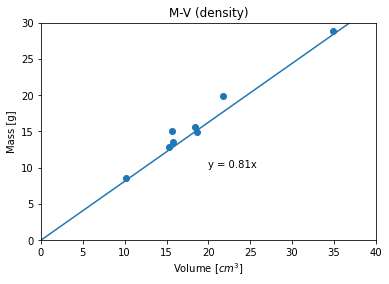

In [11]:
##密度

file = r"C:\Users\vetsa\OneDrive\デスクトップ\seminar related\results\csv\pumice\raw.csv"
data = pd.read_csv(file)

x = data['v']
y = data['0']

popt, pcov = curve_fit(f, x, y)

plt.scatter(x, y)
plt.plot([i for i in range(0, 50)], [f0(j, popt[0]) for j in range(0, 50)])
plt.xlim(0, 40)
plt.ylim(0, 30)

plt.xlabel('Volume [$cm^3$]')
plt.ylabel('Mass [g]')
plt.title('M-V (density)')

plt.text(20, 10, f'y = {round(popt[0], 2)}x')

print(popt[0])

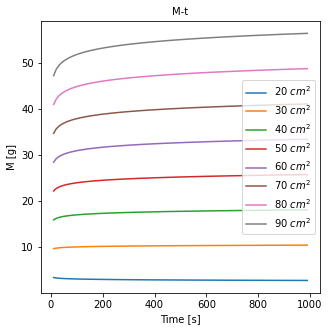

In [12]:
############
## M-t #####
############


fig = plt.figure(figsize=(5,5))

t = [i for i in range(10, 1000, 10)]

for x in range(20, 100, 10):
    plt.plot(t, [M(j, x) for j in t], label = f'{x} $cm^2$')

    plt.xlabel("Time [s]")
    plt.ylabel("M [g]")
    
plt.title('M-t', size = 10)
plt.legend()
plt.savefig(fr"C:\Users\vetsa\OneDrive\デスクトップ\seminar related\results\png\m\{x}.jpg")

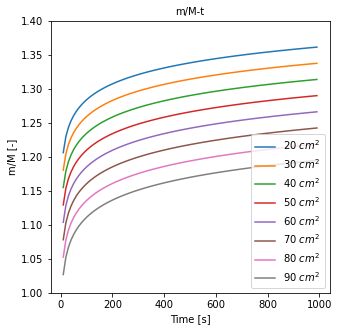

In [13]:
###########
## m/M-t ##
###########

fig = plt.figure(figsize=(5,5))


t = [i for i in range(10, 1000, 10)]

for x in range(20, 100, 10):
    plt.plot(t, [m(j, x) for j in t], label = f'{x} $cm^2$')

#plt.xlim(30, 65)
plt.ylim([1,1.4])
#plt.ylim(0, 100)
plt.xlabel("Time [s]")
plt.ylabel("m/M [-]")     

plt.title('m/M-t', size = 10)
plt.legend()
plt.savefig(fr"C:\Users\vetsa\OneDrive\デスクトップ\seminar related\results\png\m\{x}.jpg")

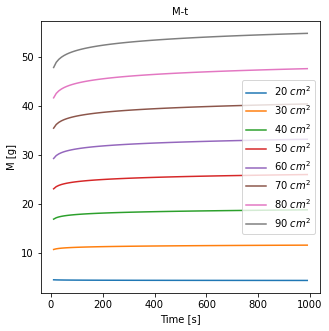

In [14]:
############
## M-t######
## with v ##
############


fig = plt.figure(figsize=(5,5))

t = [i for i in range(10, 1000, 10)]

for x in range(20, 100, 10):
    plt.plot(t, [M_v(j, x) for j in t], label = f'{x} $cm^2$')

    plt.xlabel("Time [s]")
    plt.ylabel("M [g]")
    
plt.title('M-t', size = 10)
plt.legend()
plt.savefig(fr"C:\Users\vetsa\OneDrive\デスクトップ\seminar related\results\png\m\{x}.jpg")

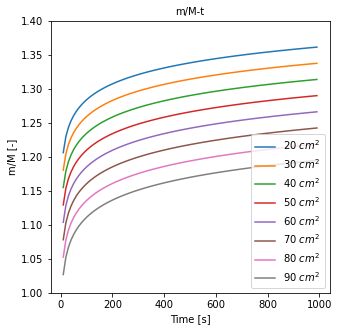

In [15]:
###########
## m/M-t ##
## with v #
###########


fig = plt.figure(figsize=(5,5))


t = [i for i in range(10, 1000, 10)]

for x in range(20, 100, 10):
    plt.plot(t, [m(j, x) for j in t], label = f'{x} $cm^2$')

#plt.xlim(30, 65)
plt.ylim([1,1.4])
#plt.ylim(0, 100)
plt.xlabel("Time [s]")
plt.ylabel("m/M [-]")     

plt.title('m/M-t', size = 10)
plt.legend()
plt.savefig(fr"C:\Users\vetsa\OneDrive\デスクトップ\seminar related\results\png\m\{x}.jpg")

Text(0.5, 1.0, 'm/M-S')

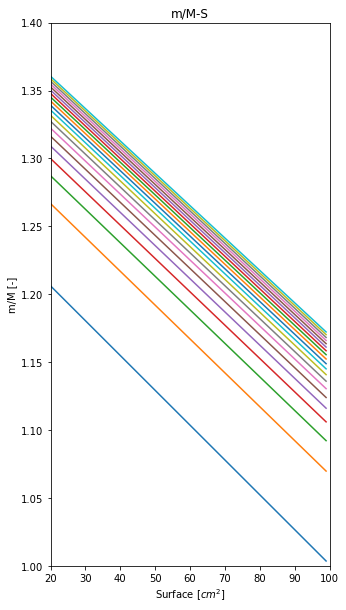

In [16]:
###########
## m/M-S ##
###########

fig = plt.figure(figsize=(5,10))

x = [i for i in range(0, 100)]

for t in range(10, 1000, 50):
    plt.plot(x, [m(t, j) for j in x], label = f'{t}s')
    
plt.xlim(20, 100)
plt.ylim([1,1.4])
#plt.ylim(0, 100)
plt.xlabel("Surface [$cm^2$]")
plt.ylabel("m/M [-]")     
plt.title('m/M-S')


Text(0.5, 1.0, 'm/M-S')

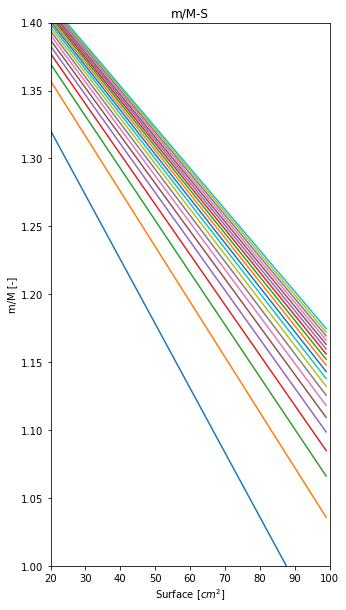

In [17]:
###########
## m/M-S ##
###########

fig = plt.figure(figsize=(5,10))

x = [i for i in range(0, 100)]

for t in range(10, 1000, 50):
    plt.plot(x, [m_v(t, j) for j in x], label = f'{t}s')
    
plt.xlim(20, 100)
plt.ylim([1,1.4])
#plt.ylim(0, 100)
plt.xlabel("Surface [$cm^2$]")
plt.ylabel("m/M [-]")     
plt.title('m/M-S')


30
 ρ = 0.02ln(t)+0.99
39
 ρ = 0.07ln(t)+1.04
40
 ρ = 0.08ln(t)+0.89
41
 ρ = 0.07ln(t)+0.94
43
 ρ = 0.06ln(t)+0.84
46
 ρ = 0.09ln(t)+0.9
48
 ρ = 0.05ln(t)+0.99
64
 ρ = 0.07ln(t)+0.83


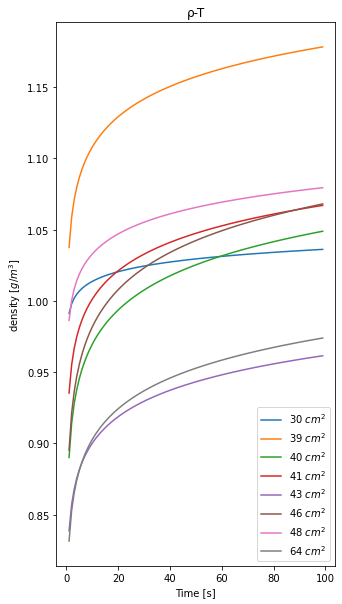

In [18]:
##密度変化

file = r"C:\Users\vetsa\OneDrive\デスクトップ\seminar related\results\csv\pumice\density.csv"
data = pd.read_csv(file)
data.index = data['s']
data = data.drop('Unnamed: 0', axis = 1).drop('s', axis = 1).drop('v', axis = 1).T
ii = [int(i) for i in data.index][1:]

list = []
for M in data.columns:

    jj = data[M][1:]

    popt, pcov = curve_fit(ln, ii, jj)
    list.append(popt)

Matrix = np.array(list)
data = pd.DataFrame(Matrix, columns = ['a', 'b'])
data.index = [30, 39, 40, 41, 43, 46, 48, 64]

fig = plt.figure(figsize=(5,10))

for x in range(len(data.index)):
    t = [i for i in range(1, 100)]
    plt.plot(t, ln(t, data['a'].iloc[x], data['b'].iloc[x]), label = str(data.index[x])+' $cm^2$')
    plt.xlabel('Time [s]')
    plt.ylabel('density [$g/m^3$]')
    plt.title('ρ-T')
    
    plt.legend(loc = 'lower right')
    
    print(data.index[x])
    print('\r ρ = '+str(round(data['a'].iloc[x], 2))+'ln(t)+'+str(round(data['b'].iloc[x], 2)))

2.38732414637843
30
 v = 0.02ln(t)+0.99
3.103521390291959
39
 v = 0.07ln(t)+1.04
3.183098861837907
40
 v = 0.08ln(t)+0.89
3.262676333383854
41
 v = 0.07ln(t)+0.94
3.42183127647575
43
 v = 0.06ln(t)+0.84
3.660563691113593
46
 v = 0.09ln(t)+0.9
3.819718634205488
48
 v = 0.05ln(t)+0.99
5.09295817894065
64
 v = 0.07ln(t)+0.83


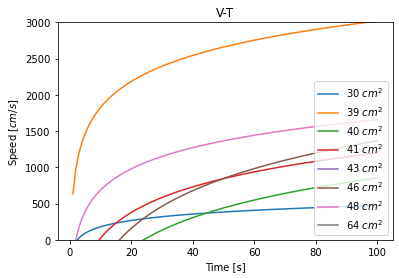

In [19]:
#密度変化による落下速度の変化
t = [i for i in range(1, 101)]

for x in range(len(data.index)):
    
    d = np.sqrt(data.index[x]/(4*np.pi))
    plt.plot(t, v(d, rho(t, data['a'].iloc[x], data['b'].iloc[x])), label = str(data.index[x])+' $cm^2$')
    
    print(d**2)
    
    plt.ylim(0, 3000)
    plt.xlabel('Time [s]')
    plt.ylabel('Speed [$cm/s$]')
    plt.title('V-T')
    
    plt.legend(loc = 'lower right')
    
    print(data.index[x])
    print('\r v = '+str(round(data['a'].iloc[x], 2))+'ln(t)+'+str(round(data['b'].iloc[x], 2)))

In [20]:
##落下速度をまとめる

t = [i for i in range(1, 101)]

list = []
for x in range(len(data.index)):
    
    d = np.sqrt(data.index[x]/(4*np.pi))
    list.append(v(d, rho(t, data['a'].iloc[x], data['b'].iloc[x])).tolist())
    
d = pd.DataFrame(list)
d.columns = d.columns + 1
d[0] = [0 for i in range(8)]
d[d<0] = 0
d

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,0
0,0.000000,0.000000,26.016718,62.600844,90.977696,114.163273,133.766399,150.747399,165.725703,179.124252,...,461.337248,462.712057,464.072162,465.417874,466.749495,468.067316,469.371620,470.662683,471.940770,0
1,635.089973,993.718644,1203.502969,1352.347316,1467.799960,1562.131640,1641.887938,1710.975987,1771.915964,1826.428632,...,2974.626329,2980.219809,2985.753464,2991.228560,2996.646325,3002.007946,3007.314575,3012.567329,3017.767291,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,804.277417,810.749839,817.153036,823.488473,829.757569,835.961700,842.102197,848.180352,854.197420,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.383415,...,1154.349496,1159.854159,1165.299948,1170.688109,1176.019848,1181.296334,1186.518702,1191.688050,1196.805444,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1302.502696,1310.606517,1318.623665,1326.555973,1334.405219,1342.173125,1349.861358,1357.471536,1365.005229,0
6,0.000000,8.530134,179.415821,300.661146,394.706326,471.546833,536.514556,592.792158,642.432520,686.837338,...,1622.133877,1626.690202,1631.197796,1635.657689,1640.070881,1644.438339,1648.761002,1653.039780,1657.275554,0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [22]:
#データの可視化

delta = 0.01
h = 150

list = []
for t in range(0, 101):
    h = h - d.loc[:, t]*delta
    list.append(h)

hdata = pd.DataFrame(list)
hdata[hdata<0] = 0
hdata = hdata.T

ims = []
fig = plt.figure(figsize=(5,10))
for t in range(0, 101):
    im = plt.scatter([i for i in range(8)], hdata.iloc[:, t], s = 100, c = 'b')
    ims.append([im])
    
anim = animation.ArtistAnimation(fig, ims)
rc('animation', html='jshtml')

plt.close()

anim